In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv',index_col='customerID')

In [3]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


### Here we can se total charges is objective. Let it change it to float.

In [6]:
data['TotalCharges'] = data['TotalCharges'].replace(r'\s+',np.nan,regex=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


# Data Exploration

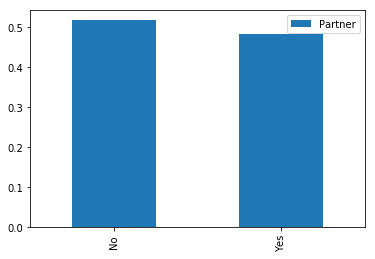

In [8]:
data.Partner.value_counts(normalize=True).plot(kind='bar');
plt.legend()

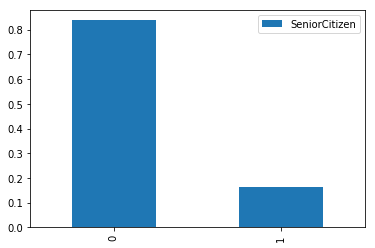

In [9]:
data.SeniorCitizen.value_counts(normalize=True).plot(kind='bar');
plt.legend()

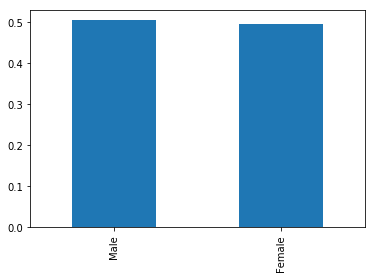

In [10]:
data.gender.value_counts(normalize=True).plot(kind='bar')

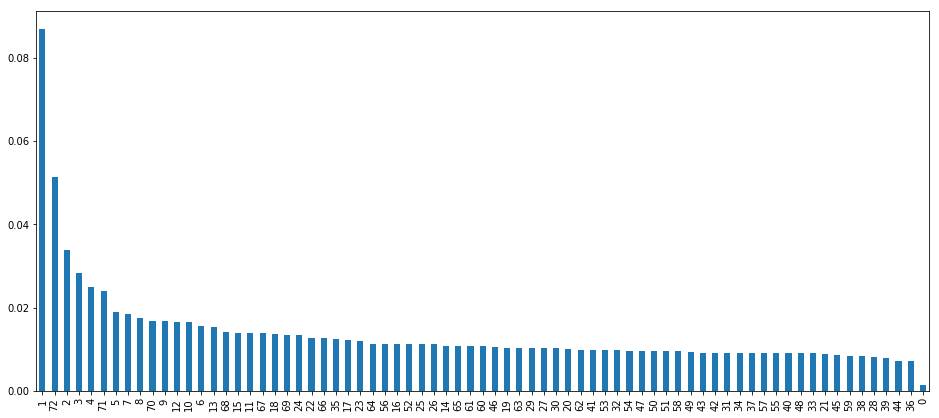

In [11]:
data.tenure.value_counts(normalize=True).plot(kind='bar', figsize=(16,7))

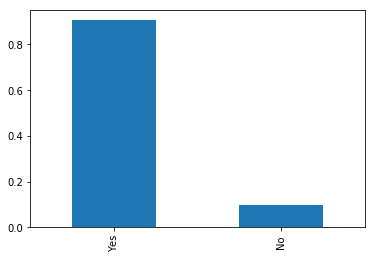

In [12]:
data.PhoneService.value_counts(normalize=True).plot(kind='bar')

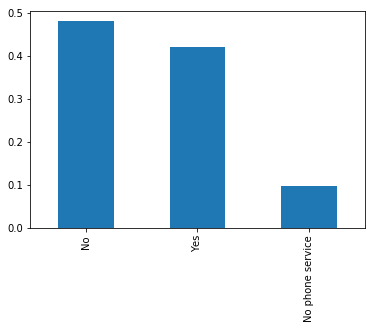

In [13]:
data.MultipleLines.value_counts(normalize=True).plot(kind='bar')

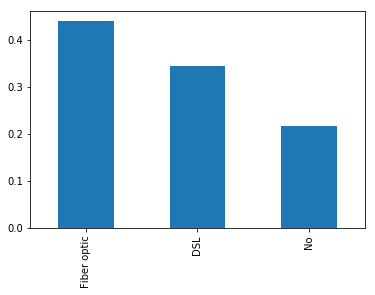

In [14]:
data.InternetService.value_counts(normalize=True).plot(kind='bar')

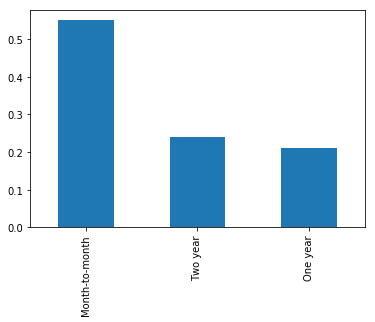

In [15]:
data.Contract.value_counts(normalize=True).plot(kind='bar')

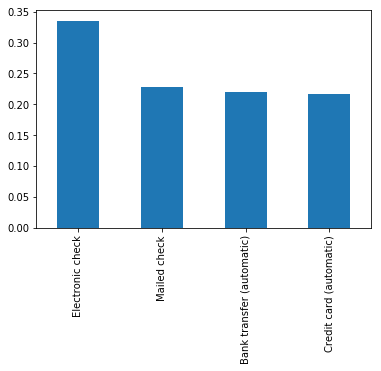

In [16]:
data.PaymentMethod.value_counts(normalize=True).plot(kind='bar')

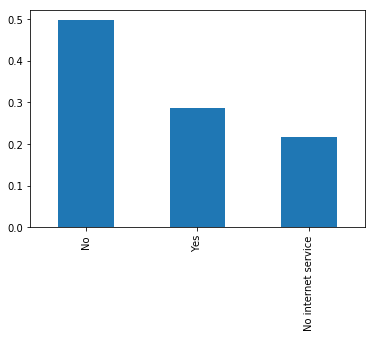

In [17]:
data.OnlineSecurity.value_counts(normalize=True).plot(kind='bar')

## Now Let's plot variables with respacted to our target varible

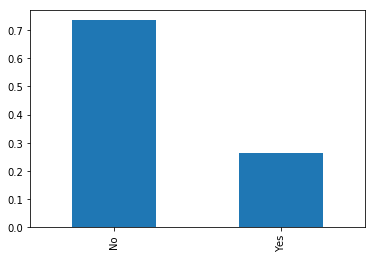

In [18]:
# first let's see our target variabel.

data.Churn.value_counts(normalize=True).plot.bar()

Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043


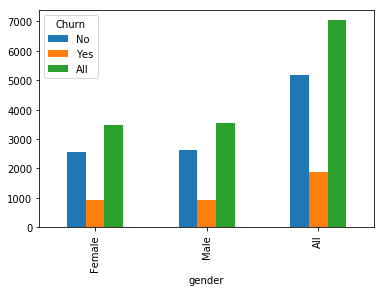

In [19]:
# now let start comparing
# gender vs churn
print((pd.crosstab(data.gender,data.Churn,margins=True)))
pd.crosstab(data.gender,data.Churn,margins=True).plot(kind='bar')


In [20]:
print('Parcentage of Females thats left the company {0}'.format((939/1869)*100))
print('Parcentage of Males thats left the company {0}'.format((930/1869)*100))

Parcentage of Females thats left the company 50.24077046548957
Parcentage of Males thats left the company 49.75922953451043


### we can see that gender does not play any importance role inpredicting out Target variabel

Churn             No   Yes   All
Contract                        
Month-to-month  2220  1655  3875
One year        1307   166  1473
Two year        1647    48  1695
All             5174  1869  7043


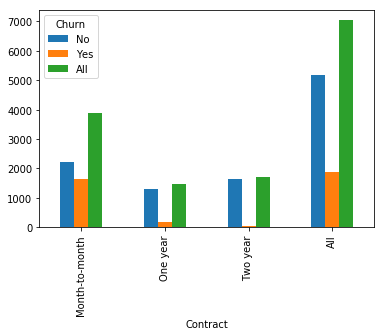

In [21]:
#contrac vs churn
print(pd.crosstab(data.Contract,data.Churn,margins=True))
pd.crosstab(data.Contract,data.Churn,margins=True).plot(kind='bar')

In [22]:
print('Parcentage of month-to-month contract pepople that left the company {0}'.format((1655/1869)*100))
print('Parcentage of one year contract pepople that left the company {0}'.format((166/1869)*100))
print('Parcentage of two year contract pepople that left the company {0}'.format((48/1869)*100))

Parcentage of month-to-month contract pepople that left the company 88.55002675227395
Parcentage of one year contract pepople that left the company 8.881754949170679
Parcentage of two year contract pepople that left the company 2.568218298555377


## Most of the people that left where the ones had who has monthly contract

Churn              No   Yes   All
InternetService                  
DSL              1962   459  2421
Fiber optic      1799  1297  3096
No               1413   113  1526
All              5174  1869  7043


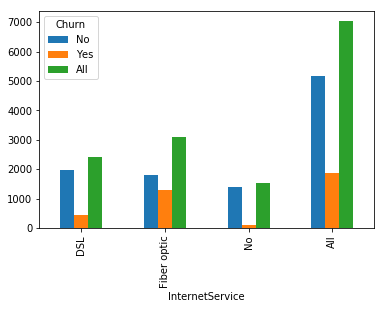

In [23]:
# internet service vs churn
print(pd.crosstab(data.InternetService,data.Churn,margins=True))
pd.crosstab(data.InternetService,data.Churn,margins=True).plot(kind='bar')

In [24]:
print('Parcentage of DSL internet service that pepople  left the company {0}'.format((459/1869)*100))
print('Parcentage of Fiber optics pepople that left the company {0}'.format((1297/1869)*100))
print('Parcentage of no internet services pepople that left the company {0}'.format((13/1869)*100))

Parcentage of DSL internet service that pepople  left the company 24.558587479935795
Parcentage of Fiber optics pepople that left the company 69.39539860888175
Parcentage of no internet services pepople that left the company 0.6955591225254146


## Most of the Peopel left who use fiber optics

Churn    No   Yes
row_0            
29.0   5174  1869


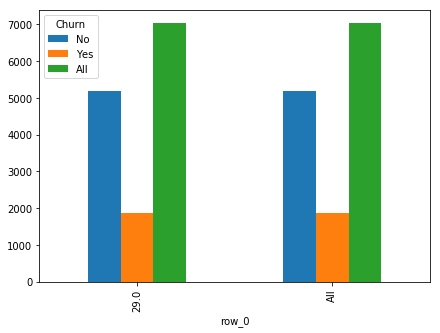

In [25]:
# Tenure median vs Churn
print(pd.crosstab(data.tenure.median(),data.Churn))
pd.crosstab(data.tenure.median(),data.Churn,margins=True).plot(kind='bar',figsize=(7,5))

Dependents    No   Yes   All
Partner                     
No          3280   361  3641
Yes         1653  1749  3402
All         4933  2110  7043


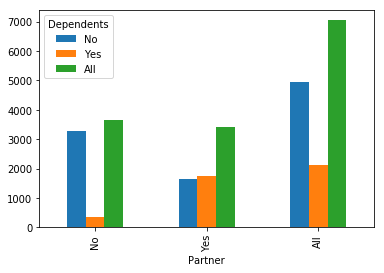

In [26]:
# Partnar vs Dependents
print(pd.crosstab(data.Partner,data.Dependents,margins=True))
pd.crosstab(data.Partner,data.Dependents,margins=True).plot(kind='bar')

In [27]:
print('Parcentage of partner that has dependents {0}'.format((1749/2110)*100))
print('Parcentage of Non partner that has dependents {0}'.format((361/2110)*100))

Parcentage of partner that has dependents 82.8909952606635
Parcentage of Non partner that has dependents 17.10900473933649


### We can see that Partner has large percentage then Non Partner this tells us that most of the partner might be married

Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


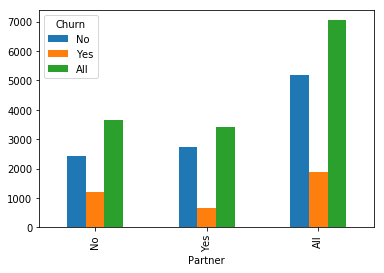

In [28]:
#partner vs churn

print(pd.crosstab(data.Partner,data.Churn,margins=True))
pd.crosstab(data.Partner,data.Churn,margins=True).plot(kind='bar')

Churn            No   Yes   All
SeniorCitizen                  
0              4508  1393  5901
1               666   476  1142
All            5174  1869  7043


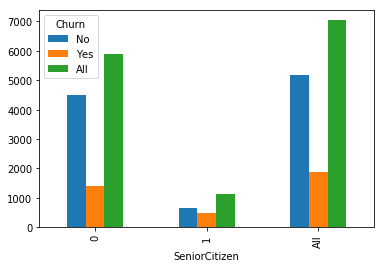

In [29]:
#SeniorCitizen vs churn

print(pd.crosstab(data.SeniorCitizen,data.Churn,margins=True))
pd.crosstab(data.SeniorCitizen,data.Churn,margins=True).plot(kind='bar')

## Let's check outlier in month to month contrack and total charges by using box plot


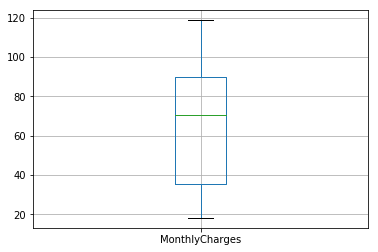

In [30]:
data.boxplot('MonthlyCharges')

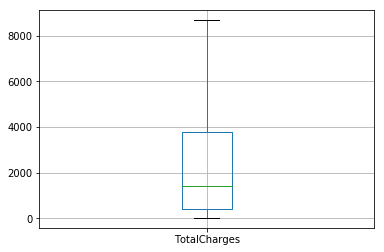

In [31]:
data.boxplot('TotalCharges')

## Both monthlycharges and totalcharges does't have any outlierso we don't have to get inti extracton features from outlieaar 

In [32]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [33]:
# checking the null values
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [34]:
fill = data.MonthlyCharges * data.tenure

In [35]:
data.TotalCharges.fillna(fill,inplace=True)

In [36]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [37]:
data.loc[(data.Churn == 'Yes'), 'MonthlyCharges'].median()

79.65

In [38]:
data.loc[(data.Churn == 'Yes'), 'TotalCharges'].median()

703.55

In [39]:
data.loc[(data.Churn == 'Yes'), 'tenure'].median()

10.0

In [40]:
data.loc[(data.Churn == 'Yes'), 'PaymentMethod'].value_counts(normalize=True)

Electronic check             0.573034
Mailed check                 0.164794
Bank transfer (automatic)    0.138042
Credit card (automatic)      0.124131
Name: PaymentMethod, dtype: float64

In [41]:
data.loc[(data.Churn == 'Yes'), 'PaperlessBilling'].value_counts(normalize=True)

Yes    0.749064
No     0.250936
Name: PaperlessBilling, dtype: float64

In [42]:
data.loc[(data.Churn == 'Yes'), 'DeviceProtection'].value_counts(normalize=True)

No                     0.64794
Yes                    0.29160
No internet service    0.06046
Name: DeviceProtection, dtype: float64

In [43]:
data.loc[(data.Churn == 'Yes'), 'OnlineBackup'].value_counts(normalize=True)

No                     0.659711
Yes                    0.279829
No internet service    0.060460
Name: OnlineBackup, dtype: float64

In [44]:
data.loc[(data.Churn == 'Yes'), 'TechSupport'].value_counts(normalize=True)

No                     0.773676
Yes                    0.165864
No internet service    0.060460
Name: TechSupport, dtype: float64

In [45]:
data.loc[(data.Churn == 'Yes'), 'OnlineSecurity'].value_counts(normalize=True)

No                     0.781701
Yes                    0.157838
No internet service    0.060460
Name: OnlineSecurity, dtype: float64

### we can see that left the company does 'nt use internet service like online security ,device protection,Tec support and online wekup quite often.hence our prediction these variables will be not importances. we will drop them

In [46]:
data = pd.get_dummies(data,columns=['Partner','Dependents','PhoneService','DeviceProtection','MultipleLines','StreamingTV',
                                   'StreamingMovies','Contract','PaperlessBilling','InternetService'])

In [47]:
data

,gender,SeniorCitizen,tenure,OnlineSecurity,OnlineBackup,TechSupport,PaymentMethod,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,1,No,Yes,No,Electronic check,29.85,29.85,No,...,0,0,1,0,0,0,1,1,0,0
5575-GNVDE,Male,0,34,Yes,No,No,Mailed check,56.95,1889.50,No,...,0,0,0,1,0,1,0,1,0,0
3668-QPYBK,Male,0,2,Yes,Yes,No,Mailed check,53.85,108.15,Yes,...,0,0,1,0,0,0,1,1,0,0
7795-CFOCW,Male,0,45,Yes,No,Yes,Bank transfer (automatic),42.30,1840.75,No,...,0,0,0,1,0,1,0,1,0,0
9237-HQITU,Female,0,2,No,No,No,Electronic check,70.70,151.65,Yes,...,0,0,1,0,0,0,1,0,1,0
9305-CDSKC,Female,0,8,No,No,No,Electronic check,99.65,820.50,Yes,...,0,1,1,0,0,0,1,0,1,0
1452-KIOVK,Male,0,22,No,Yes,No,Credit card (automatic),89.10,1949.40,No,...,0,0,1,0,0,0,1,0,1,0
6713-OKOMC,Female,0,10,Yes,No,No,Mailed check,29.75,301.90,No,...,0,0,1,0,0,1,0,1,0,0
7892-POOKP,Female,0,28,No,No,Yes,Electronic check,104.80,3046.05,Yes,...,0,1,1,0,0,0,1,0,1,0


### We have Encoded the cetegoricall variable with numeric get dummies property which will make it for machine to make it correct pridiction

In [48]:
data.columns

Index(['gender', 'SeniorCitizen', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

### Now let's drop variable that are not importancefor us according to our analysis

In [49]:
data.drop(['StreamingTV_No internet service','StreamingMovies_No internet service'],axis=1,inplace=True)

In [50]:
data.drop('gender',axis=1,inplace=True)

In [51]:
data.drop(['tenure','MonthlyCharges'],axis=1,inplace=True)

In [52]:
data.drop(['OnlineSecurity','OnlineBackup','TechSupport','PaymentMethod'],axis=1,inplace=True)

### Now Let's convert churn 'YES' or 'NO' to 1 or 0

In [53]:
data=pd.get_dummies(data,columns=['Churn'],drop_first=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 27 columns):
SeniorCitizen                           7043 non-null int64
TotalCharges                            7043 non-null float64
Partner_No                              7043 non-null uint8
Partner_Yes                             7043 non-null uint8
Dependents_No                           7043 non-null uint8
Dependents_Yes                          7043 non-null uint8
PhoneService_No                         7043 non-null uint8
PhoneService_Yes                        7043 non-null uint8
DeviceProtection_No                     7043 non-null uint8
DeviceProtection_No internet service    7043 non-null uint8
DeviceProtection_Yes                    7043 non-null uint8
MultipleLines_No                        7043 non-null uint8
MultipleLines_No phone service          7043 non-null uint8
MultipleLines_Yes                       7043 non-null uint8
StreamingTV_No                          7

## Modelling Part

In [55]:
x= data.drop('Churn_Yes',axis=1).as_matrix().astype('float')
y=data['Churn_Yes'].ravel()

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [56]:
# train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [57]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(4930, 26) (4930,)
(2113, 26) (2113,)


In [58]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(x_train,y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
pred=model.predict(x_test)

In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y_test,pred)*100)
print('****************')
print(confusion_matrix(y_test,pred))

80.35967818267865
****************
[[1394  145]
 [ 270  304]]


In [69]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.68      0.53      0.59       574

    accuracy                           0.80      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



In [70]:
print('Accurry for Logistic Regresion {0}'.format(accuracy_score(y_test,pred)))

Accurry for Logistic Regresion 0.8035967818267865


In [71]:
print('confusion matrix for Logistic Regresion {0}'.format(confusion_matrix(y_test,pred)))

confusion matrix for Logistic Regresion [[1394  145]
 [ 270  304]]


In [72]:
print('Pricision for Logistic Regresion {0}'.format(precision_score(y_test,pred)))

Pricision for Logistic Regresion 0.6770601336302895


In [73]:
print('Recall for Logistic Regresion {0}'.format(recall_score(y_test,pred)))

Recall for Logistic Regresion 0.5296167247386759
